In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.signal import correlate2d
from scipy.signal import convolve2d

In [2]:
im = imageio.imread("woman.png")

In [3]:
Kgaus = np.array([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]]) * (1/273)

In [4]:
def plot_images(image, smooth_img, gauss_img, laplacian):
    if laplacian == False:
        f = plt.figure(figsize=(15,10))
        ax = f.add_subplot(131)
        ax2 = f.add_subplot(132)
        ax3 = f.add_subplot(133)

        ax.imshow(image,cmap="gray")
        ax2.imshow(smooth_img, cmap="gray")
        ax3.imshow(gauss_img, cmap="gray")
        plt.show()
    
    else:
        f = plt.figure(figsize=(15,10))
        ax = f.add_subplot(131)
        ax2 = f.add_subplot(132)
        ax3 = f.add_subplot(133)

        ax.imshow(image,cmap="gray")
        ax2.imshow(smooth_img, cmap="gray")
        ax3.imshow(gauss_img, cmap="gray")
        plt.show()

In [7]:

def gauss_lap_pyramid(image,_filter, py_size,laplacian):
    for i in range(py_size+1):
        if laplacian == False:
            print("------Gaussian Pyramid---------\n\n")
            print("Layer {}".format(i))
            
            print(image.shape)
            smooth_img = convolve2d(image,_filter,mode="valid")
            gauss_img = smooth_img[::2,::2]
            plot_images(image, smooth_img, gauss_img, laplacian)
            image = gauss_img
            
        else:
            print("------Laplacian Pyramid--------\n\n")
            print("Layer {}".format(i))
            print(image.shape)
            
            smooth_img = convolve2d(image, _filter, mode="same")
            laplac_img = image - smooth_img
            plot_images(image, smooth_img, laplac_img, laplacian)
            image = smooth_img[::2,::2]

------Gaussian Pyramid---------


Layer 0
(785, 732)


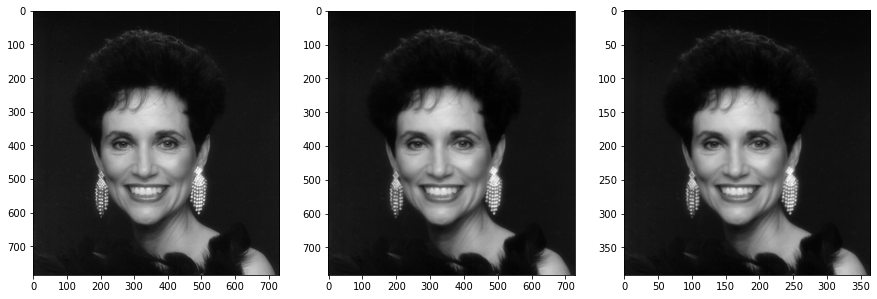

------Gaussian Pyramid---------


Layer 1
(391, 364)


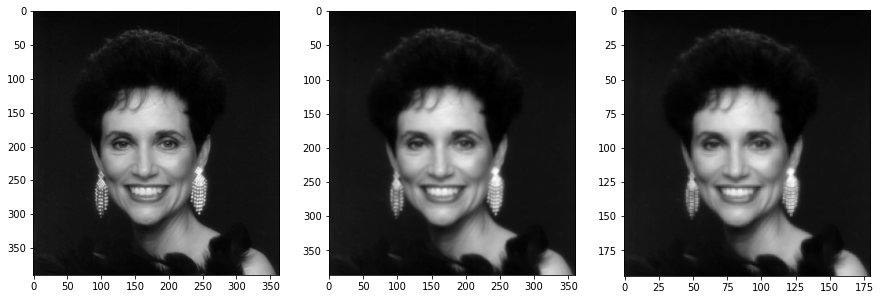

------Gaussian Pyramid---------


Layer 2
(194, 180)


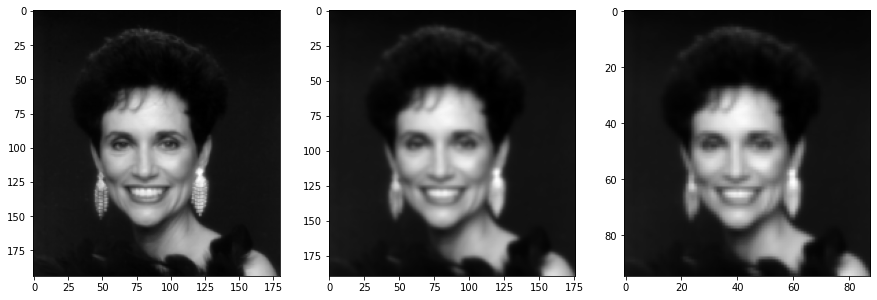

------Gaussian Pyramid---------


Layer 3
(95, 88)


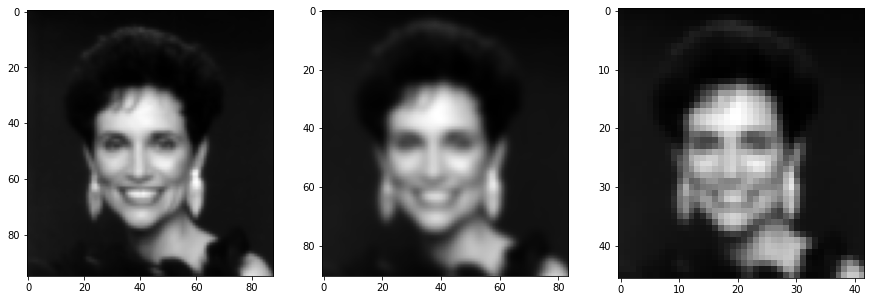

In [8]:
gauss_lap_pyramid(im,Kgaus,3,False)

------Laplacian Pyramid--------


Layer 0
(785, 732)


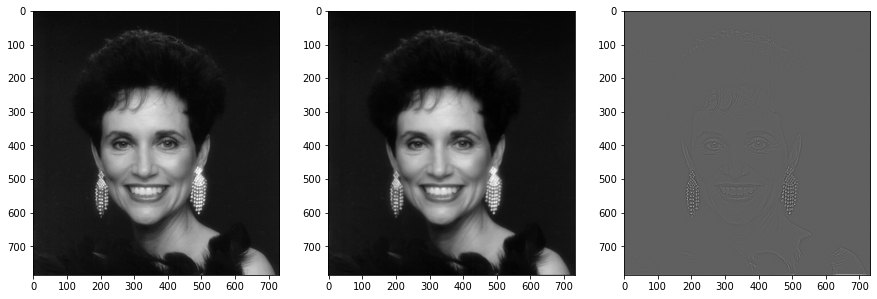

------Laplacian Pyramid--------


Layer 1
(393, 366)


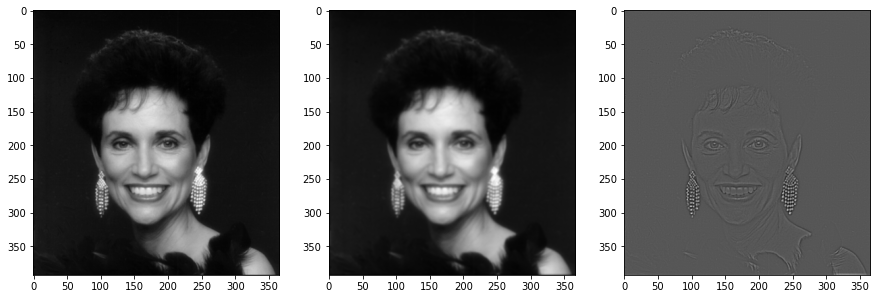

------Laplacian Pyramid--------


Layer 2
(197, 183)


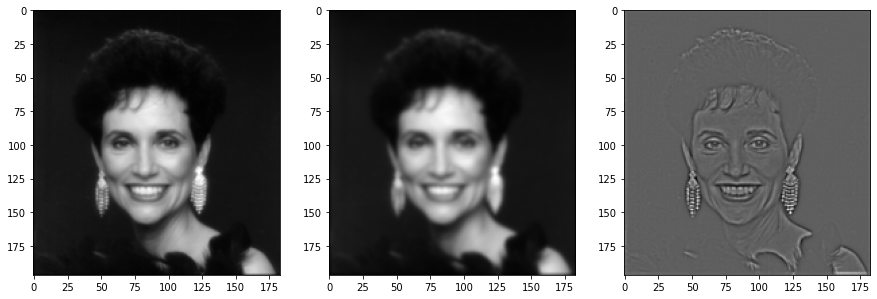

------Laplacian Pyramid--------


Layer 3
(99, 92)


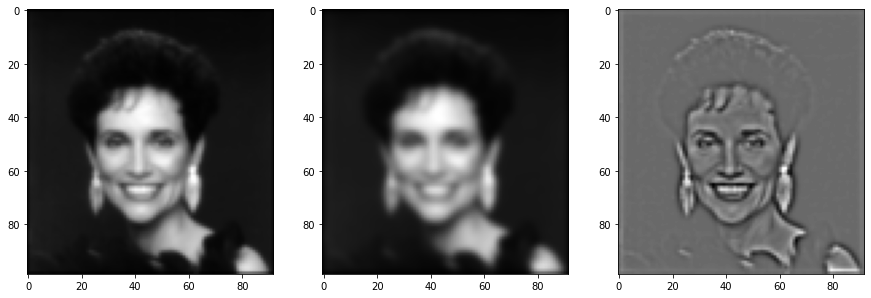

In [9]:
gauss_lap_pyramid(im,Kgaus,3,True)